In [1]:
import requests 
import re
from bs4 import BeautifulSoup

In [2]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36", "Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"}

for i in range(1, 6):
    #print("페이지 :", i)
    url = "https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=recent&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=48&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={}&rocketAll=false&searchIndexingToken=1=9&backgroundColor=".format(i)
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml")
    
    items = soup.find_all("li", attrs={"class": re.compile("^search-product")})

    for item in items:
        # 광고 제품은 제외
        ad_badge = item.find("span", attrs={"class":"ad-badge-text"})
        if ad_badge:
            #print("  <광고 상품 제외합니다>")
            continue

        name = item.find("div", attrs={"class":"name"}).get_text() # 제품명
        
        price = item.find("strong", attrs={"class":"price-value"}) # 가격
        if price:
            price = price.get_text()
        else:
            #print("  <가격 없음>")
            continue
                          
        # 리뷰 100개 이상, 평점 4.5 이상 되는 것만 조회
        rate = item.find("em", attrs={"class":"rating"}) # 평점
        if rate:
            rate = rate.get_text()
        else:
            #print("  <평점 없는 상품 제외합니다.>")
            continue

        rate_cnt = item.find("span", attrs={"class":"rating-total-count"}) # 평점 수
        if rate_cnt:
            rate_cnt = rate_cnt.get_text()[1:-1]
        else:
            #print("  <평점 수 없는 상품 제외합니다.>")
            continue

        link = item.find("a", attrs={"class":"search-product-link"})["href"]
            
        if float(rate) >= 4.5 and int(rate_cnt) >= 100:
            #print(name, price, rate, rate_cnt)
            print(f"제품명 : {name} ")
            print(f"가격 : {price}")
            print(f"평점 : {rate}점 ({rate_cnt}개)")
            print("바로가기 : {}".format("https://www.coupang.com" + link))
            print("-"*100) # 줄긋기

제품명 : 레노버 2022 아이디어패드 노트북, 아틱그레이, SLIM3 15ITL6, 코어i7, 256GB, 16GB, Free DOS 
가격 : 629,000
평점 : 5.0점 (548개)
바로가기 : https://www.coupang.com/vp/products/7164650128?itemId=18037558172&vendorItemId=85191949329&pickType=COU_PICK
----------------------------------------------------------------------------------------------------
제품명 : 레노버 2022 아이디어패드 슬림 1 15AMN7 15.6, 256GB, Free DOS, ideaPad Slim 1 15AMN7 R3, 라이젠3, Cloud Grey (82VG), 8GB 
가격 : 529,000
평점 : 5.0점 (509개)
바로가기 : https://www.coupang.com/vp/products/6990469893?itemId=17107738286&vendorItemId=84281482577
----------------------------------------------------------------------------------------------------
제품명 : 에이수스 Vivobook Go 15, 쿨 실버, 라이젠5, 256GB, 16GB, Free DOS, E1504FA-BQ494 
가격 : 479,000
평점 : 4.5점 (109개)
바로가기 : https://www.coupang.com/vp/products/7186200172?itemId=18133826276&vendorItemId=85284485959
----------------------------------------------------------------------------------------------------
제품명 : LG전자 2023그램 노트북, 옵시디안 

제품명 : LG그램 16인치 17인치 11세대 인텔 i7 Win11 360도 터치스크린 터치펜포함 RAM 16GB NVMe 512GB 16:10 블랙 16T90P-K.AAE7U1, 코어i7, WIN11 Home 
가격 : 1,299,000
평점 : 5.0점 (145개)
바로가기 : https://www.coupang.com/vp/products/7465702474?itemId=19469582423&vendorItemId=84763466268
----------------------------------------------------------------------------------------------------
제품명 : 삼성전자 노트북 플러스2 NT550XDA-K14A 삼성노트북 최신 윈도우11 탑재, WIN11 Pro, 8GB, 128GB, 셀러론, 그레이 
가격 : 449,000
평점 : 5.0점 (140개)
바로가기 : https://www.coupang.com/vp/products/6322111494?itemId=13181333190&vendorItemId=80439926241
----------------------------------------------------------------------------------------------------
제품명 : 에이수스 2021 노트북 13, 블랙, 펜티엄, 128GB, 4GB, WIN11 Home, T3300KA-LQ021WS 
가격 : 637,500
평점 : 4.5점 (164개)
바로가기 : https://www.coupang.com/vp/products/6262074164?itemId=12756224180&vendorItemId=80022478287
----------------------------------------------------------------------------------------------------
제품명 : 삼성전자 노트북 플러스2 NT550XDA-K24

In [3]:
import pandas as pd

# 스크래핑한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["name", "price", "rate", "rate_cnt"]
df = pd.DataFrame(columns=columns)

# 각 페이지 별 '상품명' '가격' '평점' '평점 수' 정보를 데이터 프레임으로 생성
for i in range(1, 6):
    #print("페이지 :", i)
    url = "https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=recent&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=48&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={}&rocketAll=false&searchIndexingToken=1=9&backgroundColor=".format(i)
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml")
    
    items = soup.find_all("li", attrs={"class": re.compile("^search-product")})
    
    for item in items:
        # 광고 제품은 제외
        ad_badge = item.find("span", attrs={"class":"ad-badge-text"})
        if ad_badge:
            #print("  <광고 상품 제외합니다>")
            continue

        name = item.find("div", attrs={"class":"name"}).get_text() # 제품명
        name = name.strip()
        
        price = item.find("strong", attrs={"class":"price-value"}) # 가격
        if price:
            price = price.get_text()
        else:
            price = None
                          
        # 리뷰 100개 이상, 평점 4.5 이상 되는 것만 조회
        rate = item.find("em", attrs={"class":"rating"}) # 평점
        if rate:
            rate = rate.get_text()
        else:
            rate = None

        rate_cnt = item.find("span", attrs={"class":"rating-total-count"}) # 평점 수
        if rate_cnt:
            rate_cnt = rate_cnt.get_text()[1:-1]
        else:
            rate_cnt = None
            
        link = item.find("a", attrs={"class":"search-product-link"})["href"]
            
        # 모든 정보를 하나의 데이터 프레임에 저장
        row = [name, price, rate, rate_cnt]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
        

C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\

C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\

C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\

C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\

C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11156\478313322.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(series, ignore_index=True)
C:\Users\user\AppData\Local\

In [4]:
df.head(5)

,name,price,rate,rate_cnt
0,"레노버 2022 아이디어패드 노트북, 아틱그레이, SLIM3 15ITL6, 코어i7...","629,000",5.0,548
1,"레노버 2022 아이디어패드 슬림 1 15AMN7 15.6, 256GB, Free ...","529,000",5.0,509
2,"에이수스 Vivobook Go 15, 쿨 실버, 라이젠5, 256GB, 16GB, ...","479,000",4.5,109
3,"LG전자 2021울트라PC, 화이트, 셀러론, 128GB, 4GB, WIN11 Ho...","399,000",5.0,3
4,"LG전자 2023그램 노트북, 옵시디안 블랙, 코어i5, 512GB, 16GB, W...","1,869,800",5.0,138


## Step 2. 키워드 추출

#### 텍스트 데이터 전처리

In [5]:
# 텍스트 정제 함수 : 삼품명만 추출
def text_cleaning(text):
    company = text.split(",")
    result = company[0]
    return result

In [6]:
print(text_cleaning(df['name'][0]))

레노버 2022 아이디어패드 노트북


In [7]:
df['name'] = df['name'].apply(lambda x: text_cleaning(x))
df[['name']].head()

,name
0,레노버 2022 아이디어패드 노트북
1,레노버 2022 아이디어패드 슬림 1 15AMN7 15.6
2,에이수스 Vivobook Go 15
3,LG전자 2021울트라PC
4,LG전자 2023그램 노트북


In [8]:
df['name'].value_counts()

LG전자 2023그램 노트북                                7
HP 2023 노트북 15                                 6
Lenovo ideapad i3-1215U FHD IPS 램8G Freedos    5
Apple 2020 맥북 에어 13                            5
델 2023 인스피론 15 3520                            4
                                              ..
HP 2023 빅터스 15                                 1
레노버 2022 V15 G3 IAP                            1
레노버 2022 ThinkPad E15 G4                       1
HP 2023 노트북 14s                                1
HP 2020 EliteBook x360 14                      1
Name: name, Length: 150, dtype: int64

#### 말뭉치 만들기

In [9]:
# 상품명 말뭉치 생성
name_corpus = " ".join(df['name'].tolist())
name_corpus

'레노버 2022 아이디어패드 노트북 레노버 2022 아이디어패드 슬림 1 15AMN7 15.6 에이수스 Vivobook Go 15 LG전자 2021울트라PC LG전자 2023그램 노트북 레노버 2022 아이디어패드 슬림 1 15AMN7 15.6 레노버 2021 ThinkPad L13 한성컴퓨터 2020 TFX 15.6 아이뮤즈 스톰북 노트북 N4020 35.81cm Apple 2020 맥북 에어 13 LG전자 2023울트라PC 엣지 LG전자 2023그램 노트북 HP 2023 노트북 15 HP 2022 VICTUS 게이밍 노트북 16.1 LG전자 2023그램 360 MSI 2023 GF63 씬 12VE 15.6 LG전자 2023그램 노트북 삼성전자 2021 노트북 플러스2 15.6 HP 2023 노트북 14 삼성전자 갤럭시북2 NT550XEZ-A58A +Windows 포함 12세대 i5 삼성전자 갤럭시북2/3 15.6 재택근무 학습용 노트북 한컴오피스팩 및 국내 정품 윈도우 패키지 동봉 에이수스 TUF Dash F15 에이수스 젠북 14 OLED 삼성전자 갤럭시북2/3 15.6 재택근무 학습용 노트북 한컴오피스팩 및 국내 정품 윈도우 패키지 동봉 MSI 2023 Cyborg 15 A12VF HP 2023 노트북 15 삼성전자 갤럭시북2 NT550XEZ-A58A +Windows 포함 12세대 i5 HP 2023 오멘 17 레노버 2022 씽크북 16 G4+ ARA Apple 2020 맥북 에어 13 LG전자 2023그램 노트북 LG전자 2023그램 노트북 MSI 2022 프레스티지 15 MSI 2023 GF63 씬 15.6 레노버 아이디어패드 슬림 1 15IJL7 82LX0085KR LG전자 2023년형 울트라PC 15UD40R-GX56K 15인치 R5-7530U 윈도우11 무선마우스 증정 레노버 2023 아이디어패드 슬림 3 15ABR8 델 2023 인스피론 15 3520 델 2023 인스피론 15 3520 A급중고 삼성 NT871Z5G I7-4720HQ/16

#### konlpy를 이용한 키워드 추출

In [10]:
!pip install konlpy

In [11]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(name_corpus)
count = Counter(nouns)

In [12]:
count

Counter({'레노버': 50,
         '아이디어': 17,
         '패드': 17,
         '노트북': 72,
         '슬림': 16,
         '에이수스': 11,
         '전자': 31,
         '울트라': 10,
         '그램': 14,
         '한성': 7,
         '컴퓨터': 7,
         '아이': 4,
         '뮤즈': 3,
         '스톰': 3,
         '북': 25,
         '맥북': 7,
         '에어': 6,
         '엣지': 2,
         '게이': 8,
         '밍': 8,
         '씬': 2,
         '삼성': 27,
         '플러스': 9,
         '갤럭시': 7,
         '포함': 6,
         '세대': 27,
         '재택근무': 4,
         '학습': 4,
         '용': 14,
         '한컴오피스': 9,
         '팩': 5,
         '및': 4,
         '국내': 4,
         '정품': 4,
         '윈도우': 26,
         '패키지': 5,
         '동봉': 4,
         '젠북': 3,
         '오멘': 3,
         '프레스티지': 1,
         '인치': 14,
         '무선': 2,
         '마우스': 4,
         '증정': 8,
         '델': 7,
         '인스피': 5,
         '론': 5,
         '급': 3,
         '중고': 3,
         '풀': 2,
         '스펙': 1,
         '인텔': 3,
         '듀얼코어': 1,
         '디': 3,


In [13]:
# 한글자 키워드를 제거.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'노트북': 72, '레노버': 50, '전자': 31, '삼성': 27, '세대': 27, '윈도우': 26, '아이디어': 17, '패드': 17, '슬림': 16, '그램': 14, '인치': 14, '에이수스': 11, '울트라': 10, '플러스': 9, '한컴오피스': 9, '무용': 9, '게이': 8, '증정': 8, '프로': 8, '한성': 7, '컴퓨터': 7, '맥북': 7, '갤럭시': 7, '가정': 7, '에어': 6, '포함': 6, '코어': 6, '패키지': 5, '인스피': 5, '빅터': 5, '아이': 4, '재택근무': 4, '학습': 4, '국내': 4, '정품': 4, '동봉': 4, '마우스': 4, '펜티엄': 4, '무상': 4, '마이크로소프트': 4, '비보': 4, '뮤즈': 3, '스톰': 3, '젠북': 3, '오멘': 3, '중고': 3, '인텔': 3, '클릭': 3, '지포스': 3, '탑재': 3, '펄스': 3, '서피스': 3, '랩탑': 3, '에이서': 3, '엣지': 2, '무선': 2, '베이직': 2, '무료': 2, '인강': 2, '데스크': 2, '포토샵': 2, '사은': 2, '최신': 2, '렌탈': 2, '리전': 2, '엔비': 2, '모던': 2, '신품': 2, '니트로': 2, '데이': 2, '오피스': 2, '프레스티지': 1, '스펙': 1, '듀얼코어': 1, '베이': 1, '직스': 1, '한정': 1, '명품': 1, '케어': 1, '매트': 1, '스킨': 1, '듀얼': 1, '하드': 1, '업무': 1, '게임': 1, '식용': 1, '주연테크': 1, '캐리': 1, '대여': 1, '임대': 1, '사용': 1, '관공서': 1, '대량': 1, '가능': 1, '터치스크린': 1, '스위프트': 1, '선택': 1, '터치': 1, '플립': 1, '엑티브': 1, '보증': 1, '맥미니': 1, '벡터': 1, '미니

In [14]:
# 불용어를 추가.
stopwords = ['플러스', '게이', '아이디어', '패드', '세대', '무용', '증정', '포함', '리전', '선택', '클릭', '가정', '장착', '빅터',
                       '서피스', '에이서', '패키지', '임대', '엔비', '베이', '직스', '아이', '뮤즈', '학습', '동봉', '대여', '사용', 
                       '관공서', '대량', '가능', '블랙', '비보', '스텔스', '케어', '매트', '스킨', '업무', '식용', '하드', '주연테크',
                       '캐리', '펄스', '기본', '플립', '브라보', '기업', '슬림하', '크로스', '헤어', '니트로']

In [15]:
# 키워드 데이터에서 불용어를 제거
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords and len(x) > 1})
print(remove_char_counter)

Counter({'노트북': 72, '레노버': 50, '전자': 31, '삼성': 27, '윈도우': 26, '슬림': 16, '그램': 14, '인치': 14, '에이수스': 11, '울트라': 10, '한컴오피스': 9, '프로': 8, '한성': 7, '컴퓨터': 7, '맥북': 7, '갤럭시': 7, '에어': 6, '코어': 6, '인스피': 5, '재택근무': 4, '국내': 4, '정품': 4, '마우스': 4, '펜티엄': 4, '무상': 4, '마이크로소프트': 4, '스톰': 3, '젠북': 3, '오멘': 3, '중고': 3, '인텔': 3, '지포스': 3, '탑재': 3, '랩탑': 3, '엣지': 2, '무선': 2, '베이직': 2, '무료': 2, '인강': 2, '데스크': 2, '포토샵': 2, '사은': 2, '최신': 2, '렌탈': 2, '모던': 2, '신품': 2, '데이': 2, '오피스': 2, '프레스티지': 1, '스펙': 1, '듀얼코어': 1, '한정': 1, '명품': 1, '듀얼': 1, '게임': 1, '터치스크린': 1, '스위프트': 1, '터치': 1, '엑티브': 1, '보증': 1, '맥미니': 1, '벡터': 1, '미니': 1, '라이트': 1, '가방': 1, '컨버터': 1, '휴대': 1, '경량': 1, '라이': 1, '엠에스': 1, '점퍼': 1, '그레이': 1, '씽크패드': 1})


## Step 3. 시각화 : 워드 클라우드 시각화

In [16]:
!pip install pytagcloud pygame simplejson

In [49]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정.
ranked_tags = remove_char_counter.most_common(30)

# pytagcloud로 출력할 30개의 단어를 입력, 단어 출력의 최대 크기는 80으로 제한.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

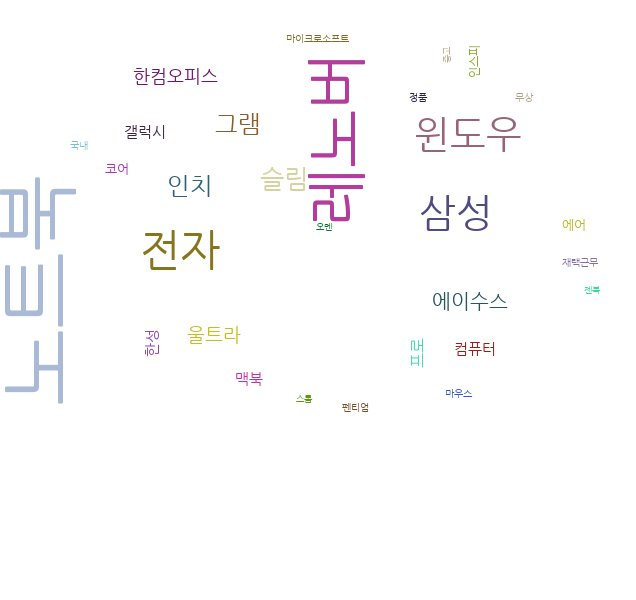

In [50]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')